In [3]:
%pip install seaborn

   ---------------------------------------- 293.3/293.3 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 10.0/10.0 MB 6.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
# Global parameters
sns.set(rc={'axes.titlecolor': 'white','axes.labelcolor': 'white', 'ytick.labelcolor':'white','xtick.labelcolor':'white', 'axes.facecolor':'#1b2838', 'figure.facecolor':'#1b2838'})

In [ ]:
sample_df = pd.read_csv('../resources/data/all_reviews_100000_sample.csv')
filtered_df = pd.read_csv('../resources/data/weighted_score_above_08_50000_sample.csv')

c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Index(['recommendationid', 'appid', 'author_steamid', 'author_num_games_owned',
       'author_num_reviews', 'author_playtime_forever',
       'author_playtime_last_two_weeks', 'author_playtime_at_review',
       'author_last_played', 'timestamp_created', 'timestamp_updated',
       'voted_up', 'votes_up', 'votes_funny', 'weighted_vote_score',
       'comment_count', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'hidden_in_steam_china'],
      dtype='object')


c:\users\danny\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<AxesSubplot:>

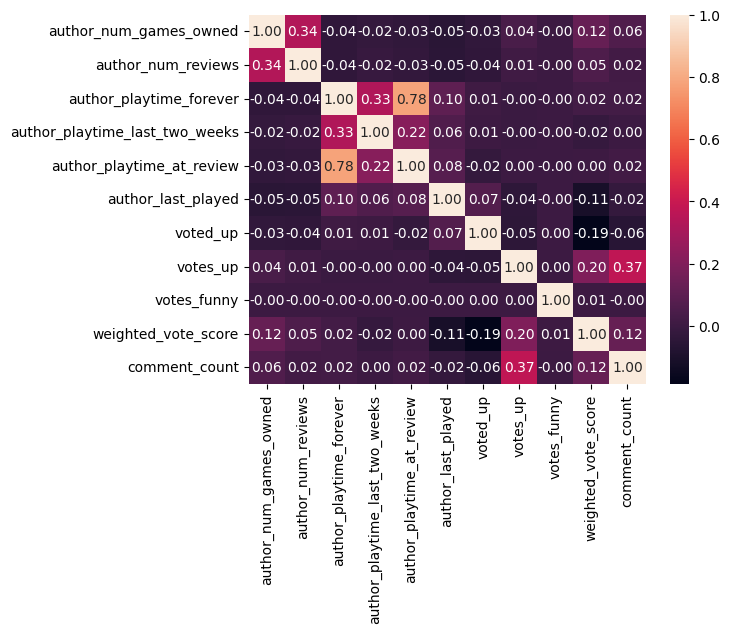

In [ ]:
numeric_df = sample_df.select_dtypes(include=['number'])
print(numeric_df.columns)
numeric_df.drop(['recommendationid', 'appid', 'author_steamid', 'timestamp_created',
       'timestamp_updated', 'steam_purchase', 'received_for_free',
       'written_during_early_access', 'hidden_in_steam_china'], axis=1, inplace=True)
corr = numeric_df.corr()
sns.heatmap(
    corr, 
    annot=True, 
    cmap = "Blues",
    fmt=".2f",
    annot_kws = {"size" : 8}
)

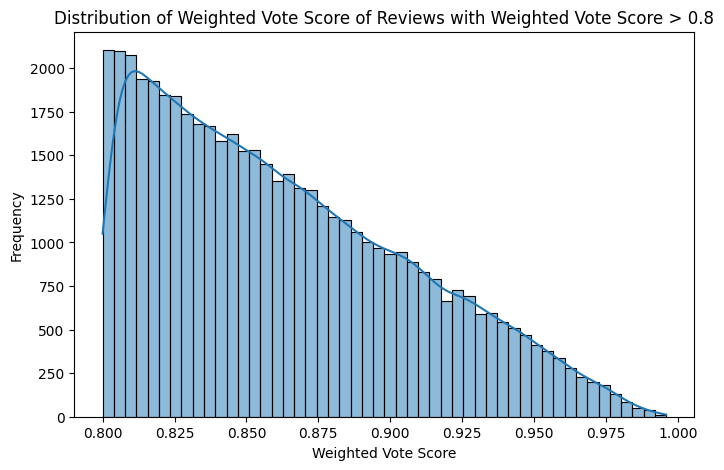

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(
    filtered_df['weighted_vote_score'], 
    bins=50, 
    color = '#66c0f4', 
    kde=True
)
plt.title('Distribution of Weighted Vote Score of Reviews with Weighted Vote Score > 0.8')
plt.xlabel('Weighted Vote Score')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:xlabel='review_length', ylabel='weighted_vote_score'>

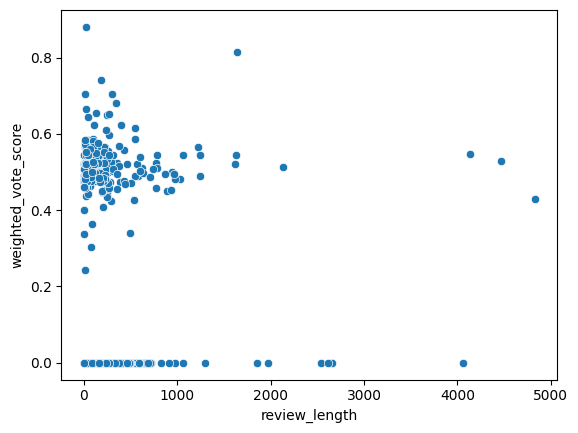

In [ ]:
sample_df['review_length'] = sample_df['review'].astype(str).apply(len)

# Plot: review length vs weighted score
sns.scatterplot(
    x='review_length', 
    y='weighted_vote_score', 
    data=sample_df.sample(1000),
    color = '#66c0f4', 
    size = 6
)

<AxesSubplot:xlabel='voted_up', ylabel='weighted_vote_score'>

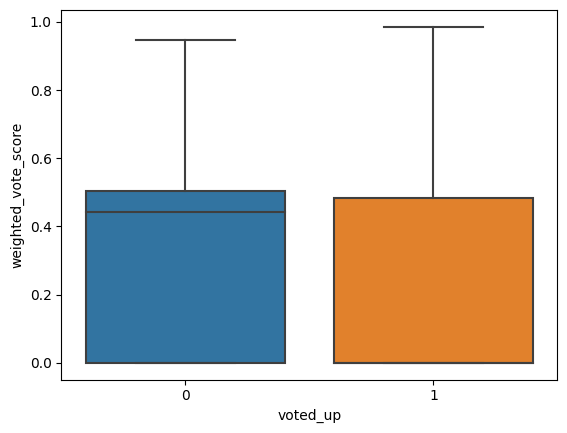

In [ ]:
# Plot: voted_up vs weighted score
sns.boxplot(
    x='voted_up', 
    y='weighted_vote_score', 
    data=sample_df, 
    boxprops=dict(color='#66c0f4'),
    whiskerprops=dict(color='#66c0f4'),
    capprops=dict(color='#66c0f4'),
)

<AxesSubplot:xlabel='review_length', ylabel='weighted_vote_score'>

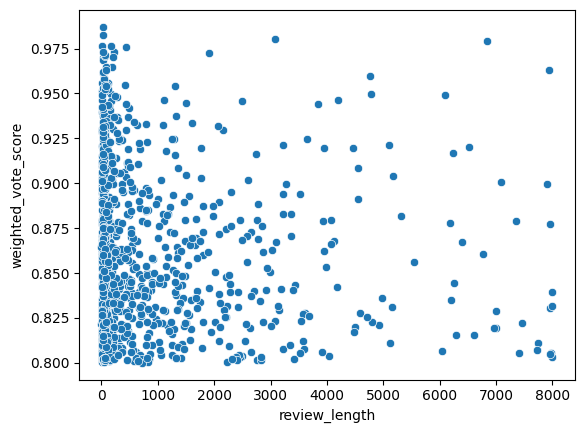

In [ ]:
filtered_df['review_length'] = filtered_df['review'].astype(str).apply(len)
sns.scatterplot(
    x='review_length', 
    y='weighted_vote_score', 
    data=filtered_df.sample(1000), 
    color = '#66c0f4', 
    size = 6
)

<AxesSubplot:xlabel='voted_up', ylabel='weighted_vote_score'>

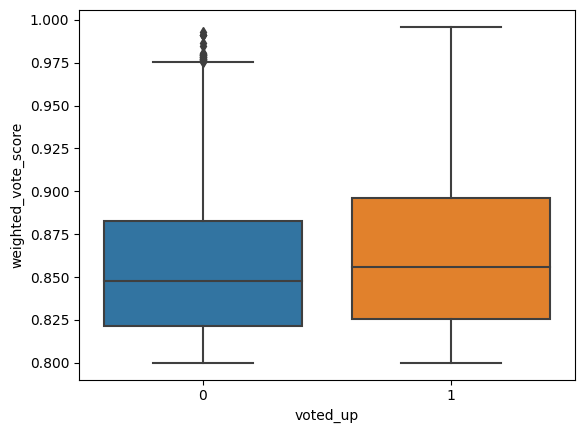

In [ ]:
sns.boxplot(x='voted_up', y='weighted_vote_score', data=filtered_df, color = '#66c0f4')

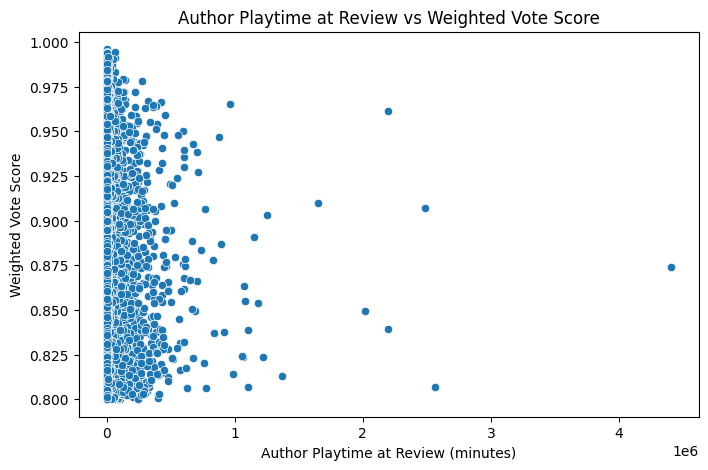

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='author_playtime_at_review', y='weighted_vote_score', data=filtered_df, color = '#66c0f4')
plt.title('Author Playtime at Review vs Weighted Vote Score')
plt.xlabel('Author Playtime at Review (minutes)')
plt.ylabel('Weighted Vote Score')
plt.show()

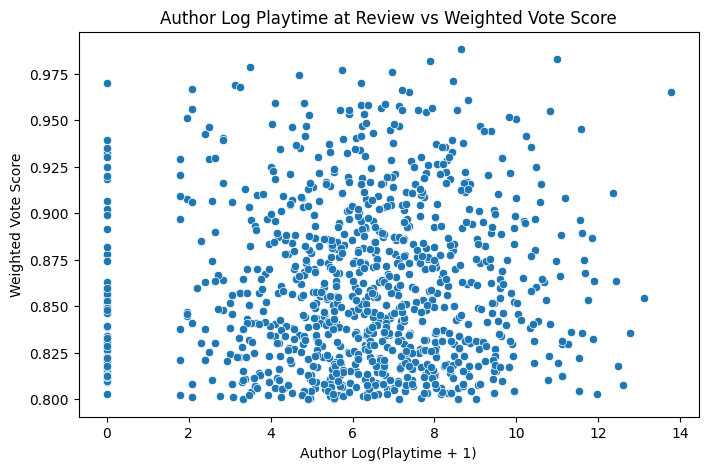

In [ ]:
# log-transform playtime
filtered_df['log_playtime'] = np.log1p(filtered_df['author_playtime_at_review'])
plt.figure(figsize=(8, 5))
sns.scatterplot(x='log_playtime', y='weighted_vote_score', data=filtered_df.sample(1000), color = '#66c0f4')
plt.title('Author Log Playtime at Review vs Weighted Vote Score')
plt.xlabel('Author Log(Playtime + 1)')
plt.ylabel('Weighted Vote Score')
plt.show()

# Doesn't seem to be a relationship between weighted vote score and playtime